In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
p_1 = pd.read_excel('/content/gdrive/MyDrive/hana/pot_sim/ETF_data.xlsx', index_col=0)

In [ ]:
p_2 = pd.read_excel('/content/gdrive/MyDrive/hana/pot_sim/PCA_data.xlsx', index_col=0)

In [ ]:
result = pd.merge(p_1, p_2, left_index=True, right_index=True, how='inner')

# Scaling & PCA

In [ ]:
scale_columns = result.columns[:8]
pca_columns = result.columns[8:]

scale_data = result.loc[:, scale_columns]
pca_data = result.loc[:, pca_columns]

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scale_data)
scaled_df = pd.DataFrame(scaled_data, columns=scale_data.columns)

In [ ]:
pca = PCA()

# 데이터를 통해 PCA 모델 학습
pca.fit(pca_data)

# 누적 설명된 분산 비율 계산
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# 주성분 중요도 확인
print("Cumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)

Cumulative Explained Variance Ratio:
[0.08723878 0.16645946 0.23315316 0.29889042 0.35982153 0.41312722
 0.46330114 0.50985231 0.55320625 0.59535722 0.63243579 0.66617273
 0.69665229 0.72519684 0.75200139 0.77708829 0.80025254 0.82250906
 0.84433792 0.86305769 0.88078434 0.89623318 0.91043683 0.92376257
 0.93486434 0.94538203 0.95487388 0.96270902 0.9701915  0.97663363
 0.98204949 0.98625422 0.98963959 0.99253485 0.99464282 0.99670965
 0.99817761 0.99907799 0.99971213 1.        ]


In [ ]:
# 선택한 주성분의 수
n_components = 5

# 주성분 중요도에서 정보 손실율 계산
info_loss = 1 - cumulative_variance_ratio[n_components - 1]

print(f"\nInformation Loss with {n_components} Components: {info_loss:.4f}")



Information Loss with 5 Components: 0.6402


In [ ]:
# 주성분을 사용하여 데이터 변환
transformed_data = pca.transform(pca_data)

# 두 개의 주성분으로 이루어진 데이터프레임 생성
pca_df = pd.DataFrame(data=transformed_data[:, :n_components], index=pca_data.index).reset_index()

pca_df = pca_df.set_index('종목명')
pca_df.columns = ['PCA_' + str(i) for i in range(1, n_components+1)]

In [ ]:
final_df = pd.concat([scaled_df, pca_df.reset_index()], axis=1).set_index('종목명')

In [88]:
final_df

,현재가,전일비,등락률,NAV,3개월수익률,거래량,거래대금,시가총액,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
종목명,,,,,,,,,,,,,
KODEX 200,0.828577,0.189189,0.724409,0.829421,0.027385,0.201847,0.524498,1.000000,-2.152926,-0.898682,0.831521,-0.564867,-0.470340
TIGER 200,0.828757,0.216216,0.708661,0.829493,0.027198,0.039328,0.102225,0.496545,-1.413931,-0.971391,0.990430,-0.640610,-0.445248
KODEX 200TR,0.115065,0.000000,0.755906,0.115357,0.023100,0.005076,0.004217,0.212127,0.704703,0.699347,1.968365,0.202148,-0.571472
KBSTAR 200,0.831286,0.054054,0.787402,0.831190,0.032414,0.007006,0.018257,0.210340,0.310661,0.888233,0.244492,0.147525,1.871932
KODEX 코스닥150 레버리지,0.180997,0.594595,0.000000,0.184123,0.982116,1.000000,1.000000,0.180387,0.287430,-1.359569,-0.544668,0.262468,-0.696430
HANARO 200,0.829660,0.189189,0.724409,0.830035,0.029061,0.004409,0.011472,0.152966,1.568011,-0.677260,0.687700,0.380566,-1.045794
ARIRANG 200,0.834538,0.162162,0.732283,0.835019,0.028875,0.007087,0.018510,0.152828,0.563589,0.585871,-0.713626,-1.918191,-0.103319
KODEX MSCI Korea TR,0.113439,0.054054,0.669291,0.114562,0.004844,0.000392,0.000324,0.129392,-0.683465,0.744960,-1.045823,-0.107624,-1.253555
TIGER MSCI Korea TR,0.198699,0.081081,0.669291,0.200195,0.006706,0.030001,0.031225,0.124681,-0.703702,-1.293105,-0.120717,0.587564,-1.027447


In [ ]:
E = cosine_similarity(final_df, final_df) #사이킷런에서 코사인 유사도 호출해서 계산

E_pd = pd.DataFrame(E) #Array를 데이터프레임으로 변환

for n in range(len(E_pd)): #편의를 위해 자신의 유사도는 0으로 변환
    E_pd.iloc[n][n] = 0

In [ ]:
E_subset

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.955321,0.078632,-0.005781,0.213943,0.022092,0.110287,0.216494,0.578553,-0.371218
1,0.955321,0.000000,0.196214,0.010223,0.186899,0.203253,0.179868,0.108076,0.588639,-0.279780
2,0.078632,0.196214,0.000000,0.179972,-0.208363,0.551637,-0.023260,-0.154163,-0.071680,0.166299
3,-0.005781,0.010223,0.179972,0.000000,-0.328040,0.022233,0.307097,-0.271938,-0.451253,0.724329
4,0.213943,0.186899,-0.208363,-0.328040,0.000000,0.361800,-0.029886,0.060358,0.533864,-0.058781
5,0.022092,0.203253,0.551637,0.022233,0.361800,0.000000,0.200347,-0.061105,0.352178,0.438629
6,0.110287,0.179868,-0.023260,0.307097,-0.029886,0.200347,0.000000,0.344074,-0.231782,0.587558
7,0.216494,0.108076,-0.154163,-0.271938,0.060358,-0.061105,0.344074,0.000000,0.332097,-0.138749
8,0.578553,0.588639,-0.071680,-0.451253,0.533864,0.352178,-0.231782,0.332097,0.000000,-0.438766
9,-0.371218,-0.279780,0.166299,0.724329,-0.058781,0.438629,0.587558,-0.138749,-0.438766,0.000000


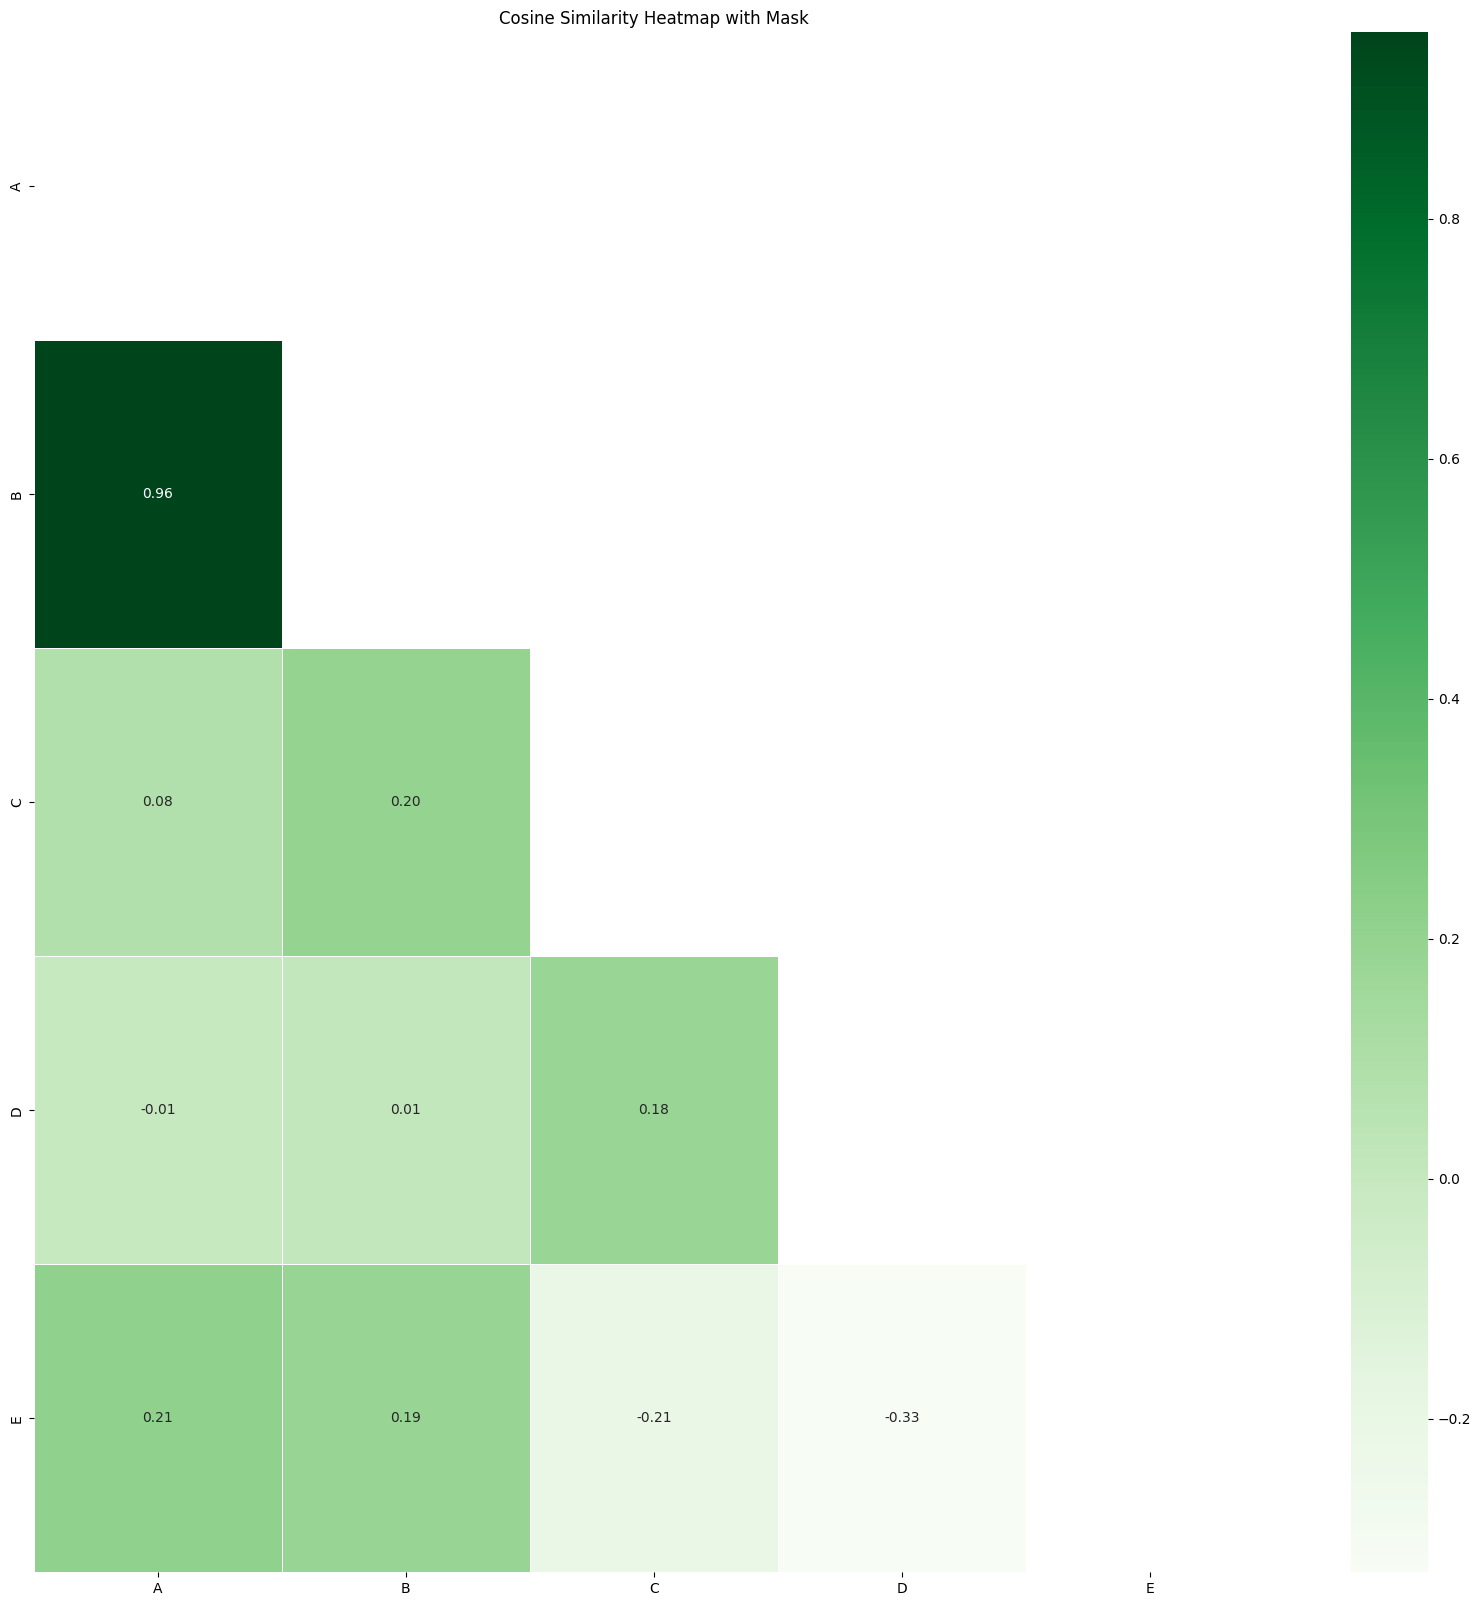

In [90]:
# 행과 열을 각각 10개씩 사용
subset_size = 5
E_subset = E_pd.iloc[:subset_size, :subset_size]
E_subset.index = ['A', 'B', 'C', 'D', 'E']
E_subset.columns = ['A', 'B', 'C', 'D', 'E']

# mask 생성
mask = np.triu(np.ones_like(E_subset, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(20, 20))
sns.heatmap(E_subset, cmap='Greens', annot=True, fmt=".2f", linewidths=.5, mask=mask)
plt.title('Cosine Similarity Heatmap with Mask')
plt.show()
